# Clusterização

In [1]:
import polars as pl
import plotly.express as px

In [2]:
df = pl.read_parquet("../data/gold/PNAD_COVID_092020_112020.parquet")

In [3]:
selected_features = [
    'regiao',
    'idade',
    'sexo',
    'cor',
    'escolaridade',
    'tipo_domicilio',
    'restricao_contato',
    'tipo_trabalho',
    
    'febre',
    'tosse',
    'dor_garganta',
    'dificuldade_respirar',
    'dor_cabeça',
    'dor_peito',
    'nausea',
    'nariz_entupido',
    'fadiga',
    'dor_olhos',
    'perda_olfato_paladar',
    'dor_muscular',
    'diarreia',

    'atendimento_publico',
    'ambulatorio_privado',
    'pronto_socorro_privado',
    'hospital_privado',

    'diagnostico_diabetes',
    'diagnostico_hipertensao',
    'diagnostico_doenca_pulmao',
    'diagnostico_doenca_cardiaca',
    'diagnostico_depressao',
    'diagnostico_cancer',
    
    'resultado_positivo'
]

Preparando dataset para clusterização

In [4]:
df_clustering = (
    df
    .select(
        pl.col(selected_features)
    )
    .filter(
        (pl.col('atendimento_publico') == 0) & (pl.col('resultado_positivo') <= 1)
    )
    .select(
        pl.col('regiao').replace({
            'Sul': 'sul', 
            'Sudeste': 'sudeste', 
            'Centro-Oeste': 'centro_oeste', 
            'Norte': 'norte', 
            'Nordeste': 'nordeste', 
        }),
        (pl.col('idade')-pl.col('idade').min()) / (pl.col('idade').max()-pl.col('idade').min()),
        pl.col('sexo').replace({
            1: 'homem', 
            2: 'mulher'
        }),
        pl.col('cor').replace({
            1: 'branca', 
            2: 'preta', 
            3: 'amarela', 
            4: 'parda', 
        }),
        pl.col('escolaridade').replace({
            1: 'sem_instrução',
            2: 'fundamental_incompleto',
            3: 'fundamental_completo',
            4: 'medio_incompleto',
            5: 'medio_completo',
            6: 'superior_incompleto',
            7: 'superior_completo',
            8: "pos_graduação"
        }),
        pl.col('tipo_domicilio').replace({
            1: "proprio_ja_pago",
            2: "proprio_pagando",
            3: "alugado",
            4: "cedido_empregador",
            5: "cedido_familiar",
            6: "cedido_outra_forma",
            7: "outra_condição"
        }),
        pl.col('restricao_contato').replace({
            1: 'nao_fez', 
            2: 'reduziu', 
            3: 'necessidade_basica',
            4: 'rigorasamente_casa',
            9: 'ignorado'
        }),
        pl.col('tipo_trabalho').fill_null(99).replace({
            1: "trabalhador_domestico",
            2: "militar", 
            3: "polícia_militar_bombeiro",
            4: "empregado_privado",
            5: "empregado_publico",
            6: "empregador",
            7: "conta_propria",
            8: "trabalhador_familiar",
            9: "fora_mercado",
            99: "nao_aplicavel"
        }),
        
        pl.col('febre').map_elements(lambda x: 0 if x > 1 else x ),
        pl.col('tosse').map_elements(lambda x: 0 if x > 1 else x ),
        pl.col('dor_garganta').map_elements(lambda x: 0 if x > 1 else x ),
        pl.col('dificuldade_respirar').map_elements(lambda x: 0 if x > 1 else x ),
        pl.col('dor_cabeça').map_elements(lambda x: 0 if x > 1 else x ),
        pl.col('dor_peito').map_elements(lambda x: 0 if x > 1 else x ),
        pl.col('nausea').map_elements(lambda x: 0 if x > 1 else x ),
        pl.col('nariz_entupido').map_elements(lambda x: 0 if x > 1 else x ),
        pl.col('fadiga').map_elements(lambda x: 0 if x > 1 else x ),
        pl.col('dor_olhos').map_elements(lambda x: 0 if x > 1 else x ),
        pl.col('perda_olfato_paladar').map_elements(lambda x: 0 if x > 1 else x ),
        pl.col('dor_muscular').map_elements(lambda x: 0 if x > 1 else x ),
        pl.col('diarreia').map_elements(lambda x: 0 if x > 1 else x ),
        
        pl.col('ambulatorio_privado').map_elements(lambda x: 0 if x > 1 else x ),
        pl.col('pronto_socorro_privado').map_elements(lambda x: 0 if x > 1 else x ),
        pl.col('hospital_privado').map_elements(lambda x: 0 if x > 1 else x ),
        
        pl.col('diagnostico_diabetes').map_elements(lambda x: 0 if x > 1 else x ),
        pl.col('diagnostico_hipertensao').map_elements(lambda x: 0 if x > 1 else x ),
        pl.col('diagnostico_doenca_pulmao').map_elements(lambda x: 0 if x > 1 else x ),
        pl.col('diagnostico_doenca_cardiaca').map_elements(lambda x: 0 if x > 1 else x ),
        pl.col('diagnostico_depressao').map_elements(lambda x: 0 if x > 1 else x ),
        pl.col('diagnostico_cancer').map_elements(lambda x: 0 if x > 1 else x ),

        pl.col('resultado_positivo')
    )
).to_dummies(
    ['regiao', 
     'sexo', 
     'cor', 
     'escolaridade',
     'tipo_domicilio',
     'restricao_contato',
     'tipo_trabalho']
)

In [5]:
df_clustering.describe()

statistic,regiao_centro_oeste,regiao_nordeste,regiao_norte,regiao_sudeste,regiao_sul,idade,sexo_homem,sexo_mulher,cor_amarela,cor_branca,cor_parda,cor_preta,escolaridade_fundamental_completo,escolaridade_fundamental_incompleto,escolaridade_medio_completo,escolaridade_medio_incompleto,escolaridade_pos_graduação,escolaridade_sem_instrução,escolaridade_superior_completo,escolaridade_superior_incompleto,tipo_domicilio_alugado,tipo_domicilio_cedido_empregador,tipo_domicilio_cedido_familiar,tipo_domicilio_cedido_outra_forma,tipo_domicilio_proprio_ja_pago,tipo_domicilio_proprio_pagando,restricao_contato_ignorado,restricao_contato_nao_fez,restricao_contato_necessidade_basica,restricao_contato_reduziu,restricao_contato_rigorasamente_casa,tipo_trabalho_conta_propria,tipo_trabalho_empregado_privado,tipo_trabalho_empregado_publico,tipo_trabalho_empregador,tipo_trabalho_fora_mercado,tipo_trabalho_militar,tipo_trabalho_nao_aplicavel,tipo_trabalho_polícia_militar_bombeiro,tipo_trabalho_trabalhador_domestico,tipo_trabalho_trabalhador_familiar,febre,tosse,dor_garganta,dificuldade_respirar,dor_cabeça,dor_peito,nausea,nariz_entupido,fadiga,dor_olhos,perda_olfato_paladar,dor_muscular,diarreia,ambulatorio_privado,pronto_socorro_privado,hospital_privado,diagnostico_diabetes,diagnostico_hipertensao,diagnostico_doenca_pulmao,diagnostico_doenca_cardiaca,diagnostico_depressao,diagnostico_cancer,resultado_positivo
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",0.189642,0.140899,0.068545,0.389947,0.210967,0.437823,0.447829,0.552171,0.011424,0.613861,0.313785,0.060929,0.030465,0.092155,0.233816,0.051028,0.127951,0.04265,0.294745,0.12719,0.191927,0.007616,0.07083,0.006093,0.597867,0.125666,0.001523,0.028941,0.321401,0.381569,0.266565,0.101295,0.329018,0.134806,0.041127,0.003046,0.012947,0.357959,0.007616,0.007616,0.00457,0.463823,0.505712,0.424981,0.247525,0.528561,0.162224,0.213252,0.388423,0.374714,0.166032,0.287129,0.412795,0.195735,0.360244,0.220107,0.484387,0.084539,0.19345,0.12262,0.059406,0.088347,0.02361,0.45773
"""std""",0.392167,0.34805,0.252776,0.487924,0.408151,0.195994,0.49746,0.49746,0.106312,0.487049,0.464207,0.239291,0.171927,0.289355,0.423418,0.220139,0.334163,0.202145,0.456102,0.333312,0.393966,0.086971,0.256639,0.077849,0.490515,0.331599,0.039014,0.167706,0.467192,0.485957,0.442332,0.301834,0.470035,0.341646,0.19866,0.055132,0.113091,0.479583,0.086971,0.086971,0.067471,0.49888,0.500158,0.494528,0.431739,0.499374,0.368797,0.40976,0.487577,0.484234,0.372251,0.452595,0.492524,0.396917,0.480254,0.414476,0.499947,0.278301,0.395153,0.328125,0.236473,0.283907,0.151889,0.4984
"""min""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""25%""",0.0,0.0,0.0,0.0,0.0,0.308511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

## Achando número de Clusters

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

X = df_clustering.to_pandas()

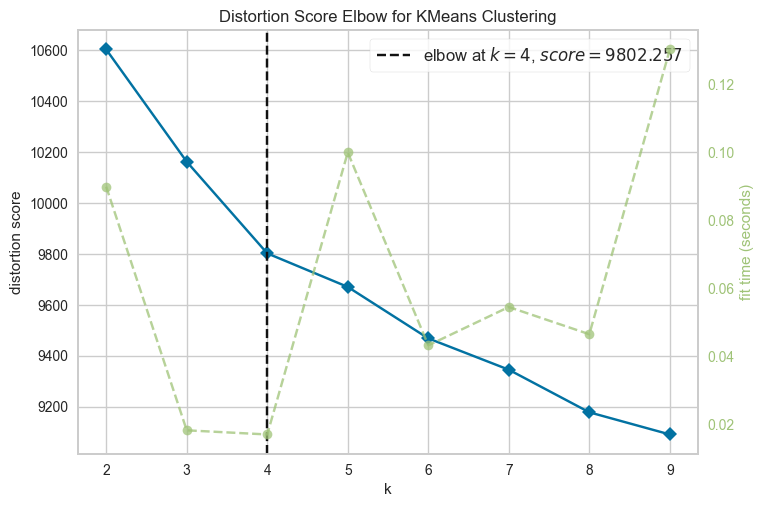

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X)
visualizer.show()

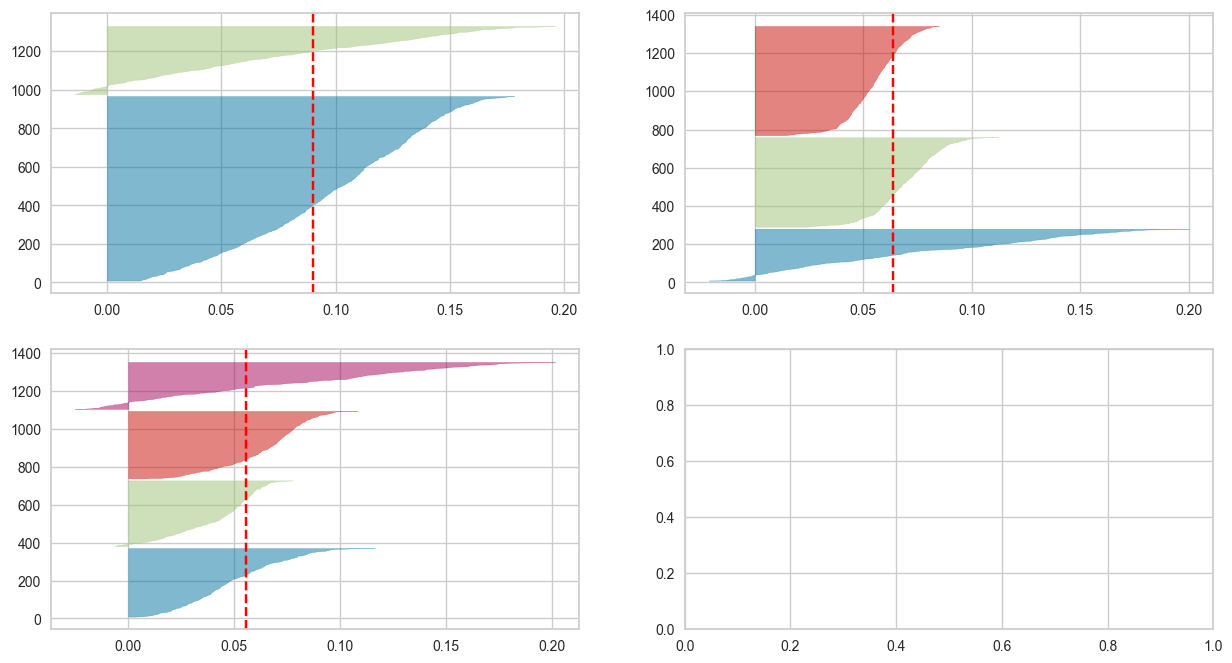

In [23]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in range(2, 5):

    km = KMeans(n_clusters=i, n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X) 

Vamos com 3 Clusters

## Clustering

In [26]:
km = KMeans(n_clusters=3, random_state=42)
km.fit(X)

KMeans(n_clusters=3, random_state=42)

In [28]:
X['cluster'] = km.labels_

In [32]:
df_cluster = pl.from_pandas(X)
df_cluster.describe()

statistic,regiao_centro_oeste,regiao_nordeste,regiao_norte,regiao_sudeste,regiao_sul,idade,sexo_homem,sexo_mulher,cor_amarela,cor_branca,cor_parda,cor_preta,escolaridade_fundamental_completo,escolaridade_fundamental_incompleto,escolaridade_medio_completo,escolaridade_medio_incompleto,escolaridade_pos_graduação,escolaridade_sem_instrução,escolaridade_superior_completo,escolaridade_superior_incompleto,tipo_domicilio_alugado,tipo_domicilio_cedido_empregador,tipo_domicilio_cedido_familiar,tipo_domicilio_cedido_outra_forma,tipo_domicilio_proprio_ja_pago,tipo_domicilio_proprio_pagando,restricao_contato_ignorado,restricao_contato_nao_fez,restricao_contato_necessidade_basica,restricao_contato_reduziu,restricao_contato_rigorasamente_casa,tipo_trabalho_conta_propria,tipo_trabalho_empregado_privado,tipo_trabalho_empregado_publico,tipo_trabalho_empregador,tipo_trabalho_fora_mercado,tipo_trabalho_militar,tipo_trabalho_nao_aplicavel,tipo_trabalho_polícia_militar_bombeiro,tipo_trabalho_trabalhador_domestico,tipo_trabalho_trabalhador_familiar,febre,tosse,dor_garganta,dificuldade_respirar,dor_cabeça,dor_peito,nausea,nariz_entupido,fadiga,dor_olhos,perda_olfato_paladar,dor_muscular,diarreia,ambulatorio_privado,pronto_socorro_privado,hospital_privado,diagnostico_diabetes,diagnostico_hipertensao,diagnostico_doenca_pulmao,diagnostico_doenca_cardiaca,diagnostico_depressao,diagnostico_cancer,resultado_positivo,cluster
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0,1313.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",0.189642,0.140899,0.068545,0.389947,0.210967,0.437823,0.447829,0.552171,0.011424,0.613861,0.313785,0.060929,0.030465,0.092155,0.233816,0.051028,0.127951,0.04265,0.294745,0.12719,0.191927,0.007616,0.07083,0.006093,0.597867,0.125666,0.001523,0.028941,0.321401,0.381569,0.266565,0.101295,0.329018,0.134806,0.041127,0.003046,0.012947,0.357959,0.007616,0.007616,0.00457,0.463823,0.505712,0.424981,0.247525,0.528561,0.162224,0.213252,0.388423,0.374714,0.166032,0.287129,0.412795,0.195735,0.360244,0.220107,0.484387,0.084539,0.19345,0.12262,0.059406,0.088347,0.02361,0.45773,1.000762
"""std""",0.392167,0.34805,0.252776,0.487924,0.408151,0.195994,0.49746,0.49746,0.106312,0.487049,0.464207,0.239291,0.171927,0.289355,0.423418,0.220139,0.334163,0.202145,0.456102,0.333312,0.393966,0.086971,0.256639,0.077849,0.490515,0.331599,0.039014,0.167706,0.467192,0.485957,0.442332,0.301834,0.470035,0.341646,0.19866,0.055132,0.113091,0.479583,0.086971,0.086971,0.067471,0.49888,0.500158,0.494528,0.431739,0.499374,0.368797,0.40976,0.487577,0.484234,0.372251,0.452595,0.492524,0.396917,0.480254,0.414476,0.499947,0.278301,0.395153,0.328125,0.236473,0.283907,0.151889,0.4984,0.878694
"""min""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""25%""",0.0,0.0,0.0,0.0,0.0,0.308511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

## Analisando

In [111]:
aux = (
    df_cluster
    .group_by('cluster')
    .agg(pl.mean('*').round(2))
)

global_mean = (
    df_cluster
    .select(
        pl.lit(3).alias('cluster'), 
        pl.all().exclude('cluster').mean().round(2)
    )
)

aux = aux.vstack(global_mean)

In [114]:
def show_heatmap(df, cols, x = ['G1', 'G2', 'G3', 'MEAN']):
    data = df.select(pl.col(cols)).to_numpy().T
    fig = px.imshow(
        data, 
        y=cols, 
        x=x,
        text_auto=True,
        color_continuous_scale='RdBu_r',
        height = len(cols)*50,
        width=700
    )
    fig.show()

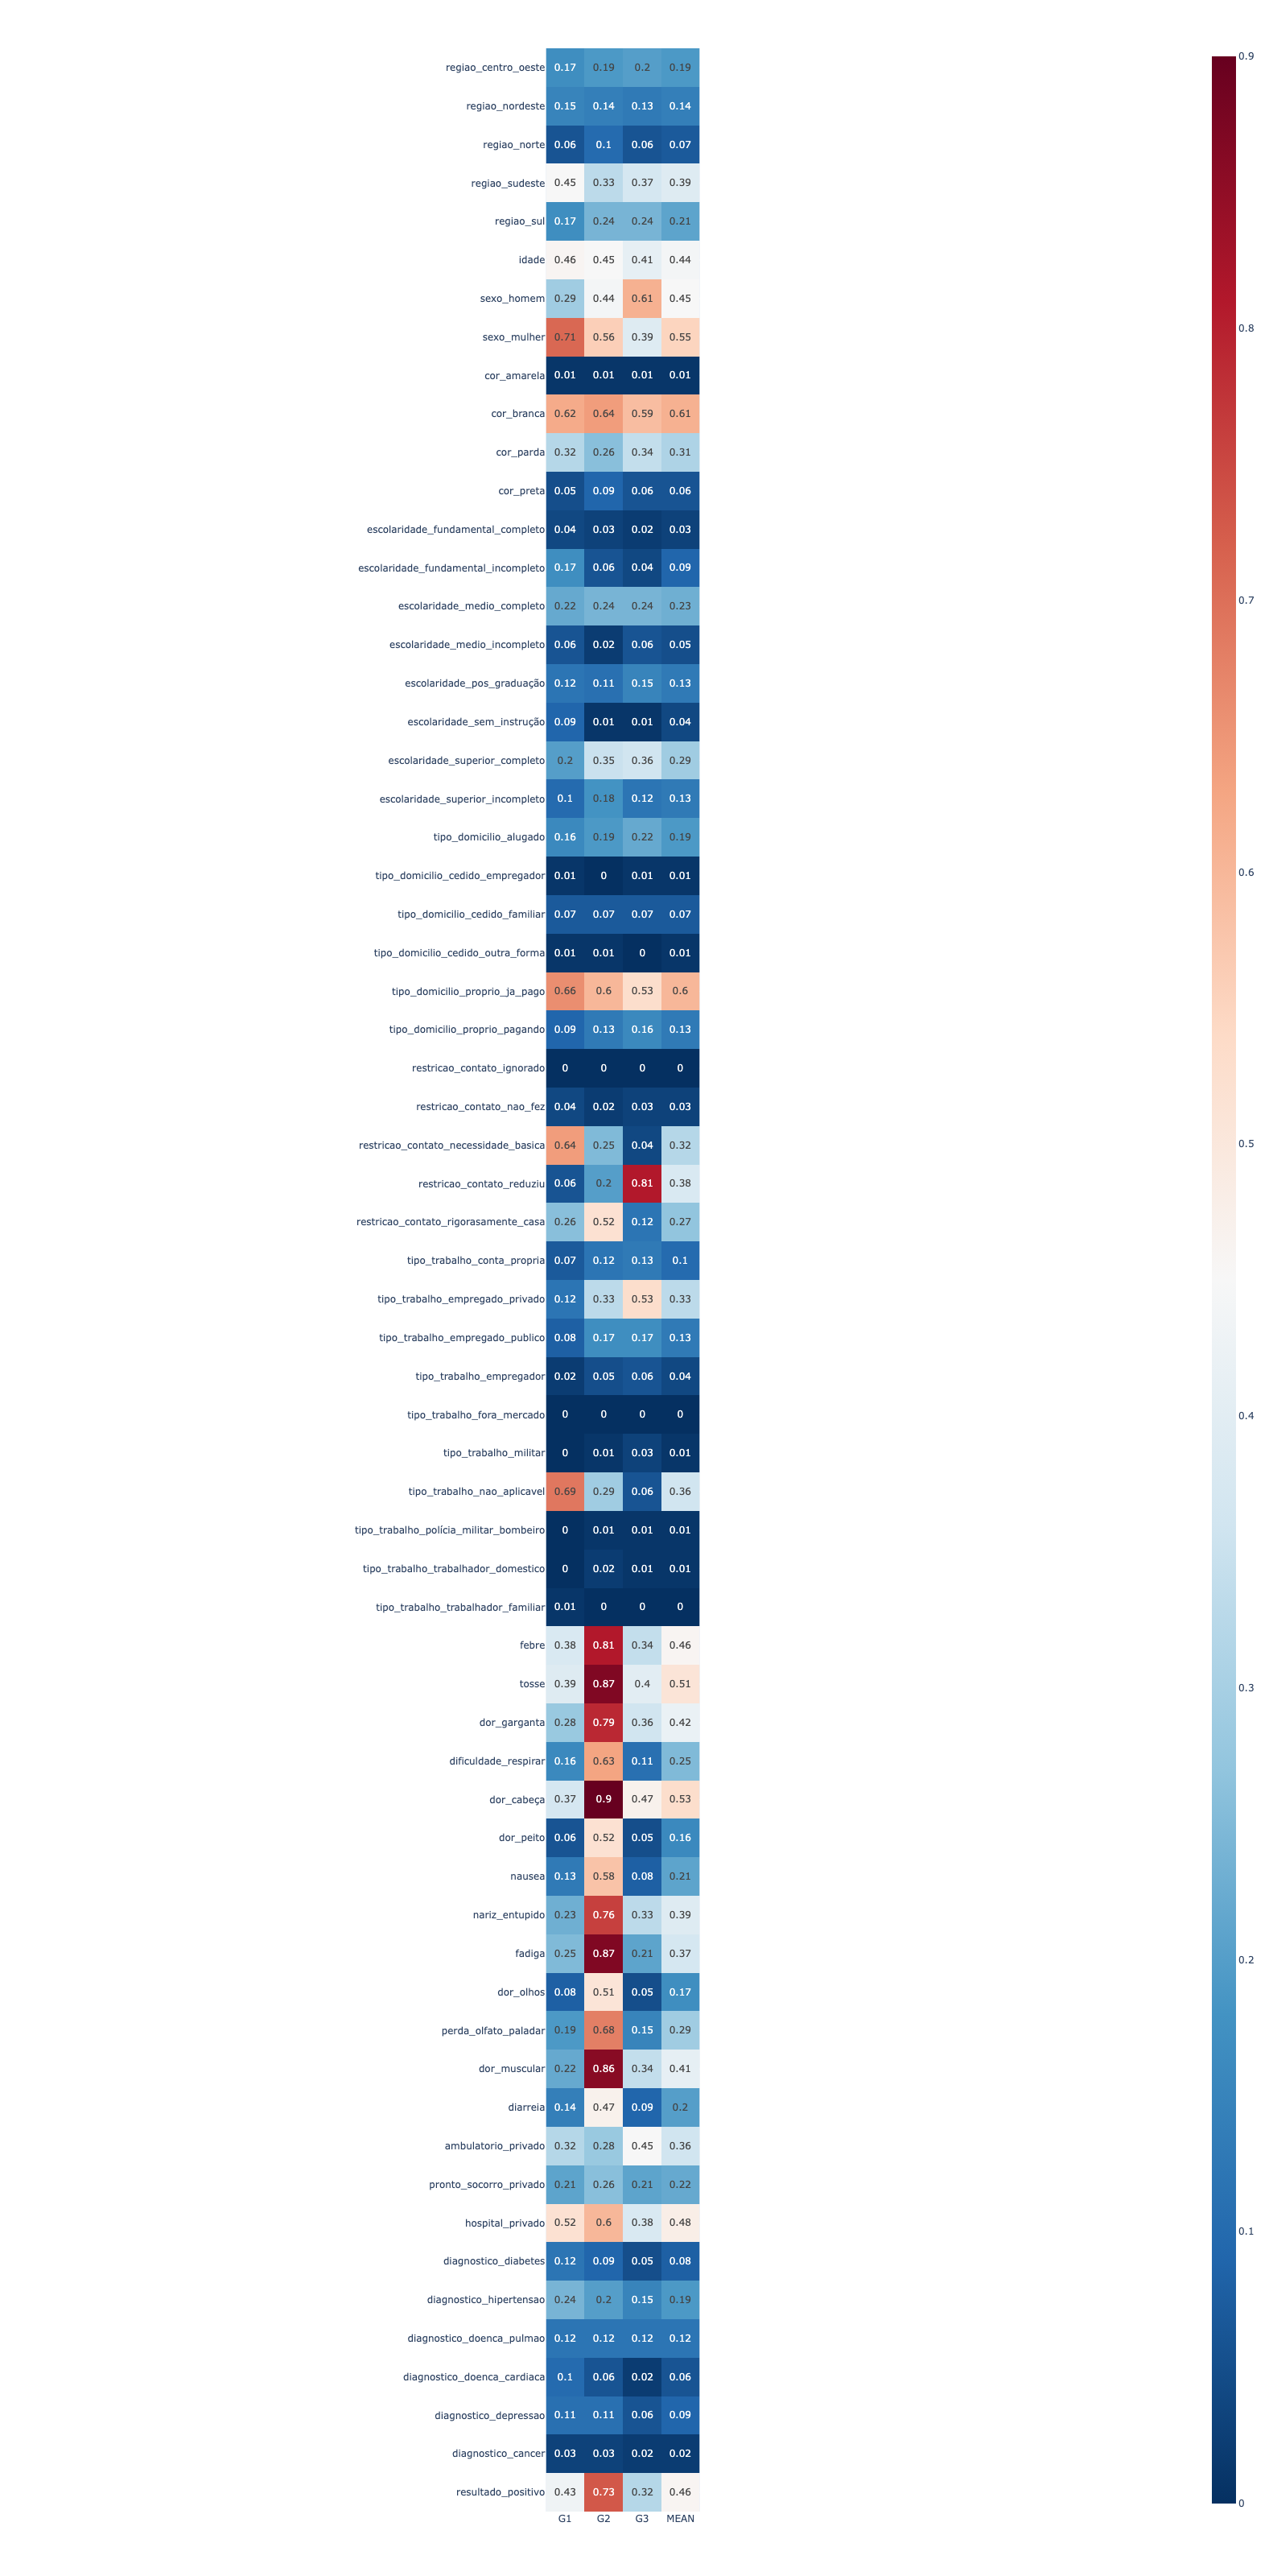

In [115]:
show_heatmap(aux, aux.select(pl.all().exclude('cluster')).columns)